### Innlasting av matplotlib og numpy

In [1]:
savenewfigs = True
largefigs = False

In [2]:
import matplotlib as mpl
from matplotlib import cm
mpl.use("pgf")



arne = True
simon = False

if arne:
    dpi = 700 # For PNG-filer

    from matplotlib import rc, font_manager as fm
    
    import cmocean
    
    #pgf_with_pdflatex = {
    #"pgf.texsystem": "pdflatex",
    #"pgf.preamble": [
    #     r"\usepackage[utf8x]{inputenc}",
    #     r"\usepackage[T1]{fontenc}",
    #     r"\usepackage{libertine}",
    #     r"\usepackage[libertine]{newtxmath}"
    #     ]
    #}
    #mpl.rcParams.update(pgf_with_pdflatex)
    
    cmap = cmocean.cm.thermal#cm.magma
    
    prop = fm.FontProperties(fname='/usr/share/fonts/opentype/linux-libertine/LinLibertine_DR.otf')

    rc('text.latex', 
       preamble=[r'\usepackage[utf8x]{inputenc}',
                 r'\usepackage[T1]{fontenc}',
                 r'\usepackage[]{amsmath,amssymb}',
                 r'\usepackage[mathtools]{}',
                 r'\usepackage{libertine}',
                 r'\usepackage[libertine]{newtxmath}',
                r'\usepackage[]{physics}',
                r'\usepackage[]{bm}'])
    rc('text',usetex=True)
    rc('figure',figsize=(5.5,3.4),dpi=dpi)
    
    red1 = (215/255, 48/255, 31/255)
    red2 = (252/255, 141/255, 89/255)
    red3 = (253/255, 204/255, 138/255)
    red4 = (254/255, 240/255, 217/255)
        
    colormap = [red1, red2, red3, red4]
    
    
elif simon:
    
    from matplotlib import rc
    
    cmap = cm.inferno
    
    dpi = 700 # For PNG-filer
    
    blu1 = (94/255, 60/255, 153/255)
    blu2 = (178/255, 171/255, 210/255)
    blu3 = (253/255, 184/255, 99/255)
    blu4 = (230/255, 97/255, 1/255)
    
    rc('text',usetex=True)
    rc('figure',figsize=(5.5,3.4),dpi=dpi)
    
    colormap = [blu1, blu2, blu3, blu4]
else:
    raise RuntimeError('GTFO')
    
    
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/arne/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
import numpy as np

## Sinustest

In [4]:
mf_xs = [np.load('sinusoidal/{}_manifold_xs.npy'.format(s)) for s in ['01','03','05','07']]
mf_ys = [np.load('sinusoidal/{}_manifold_ys.npy'.format(s)) for s in ['01','03','05','07']]
mf_zs = [np.load('sinusoidal/{}_manifold_zs.npy'.format(s)) for s in ['01','03','05','07']]
mf_tris = [np.load('sinusoidal/{}_manifold_triangulations.npy'.format(s)) for s in ['01','03','05','07']]


minseps = np.load('sinusoidal/min_seps.npy')
rms_errs = np.load('sinusoidal/error_rms.npy')
abs_errs = np.load('sinusoidal/error_norms.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


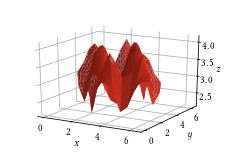

In [5]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 20
azim_ang = -60

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
#ax.set_xticks([-0.5,0,0.5,1])
#ax.set_yticks([0,0.5,1])
#ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-9)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)

ax.set_xlim(-0.31335,6.5965)
ax.set_ylim(-0.31351,6.5967)
ax.set_zlim(2.1417,4.1414)

#ax.xaxis.set_major_locator(mpl.ticker.NullLocator() )
#ax.yaxis.set_major_locator(mpl.ticker.NullLocator() )
#ax.zaxis.set_major_locator(mpl.ticker.NullLocator() )

ax.plot_trisurf(mf_xs[0],mf_ys[0],mf_zs[0],triangles=mf_tris[0],color=colormap[0],antialiased=True)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.1, bottom=0.025)
if savenewfigs:
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.pgf'.format(minseps[::2][0]),dpi=dpi)
    fig.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.png'.format(minseps[::2][0]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


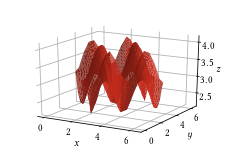

In [6]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 20
azim_ang = -60

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
#ax.set_xticks([-0.5,0,0.5,1])
#ax.set_yticks([0,0.5,1])
#ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-9)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)


ax.set_xlim(-0.31335,6.5965)
ax.set_ylim(-0.31351,6.5967)
ax.set_zlim(2.1417,4.1414)

ax.plot_trisurf(mf_xs[1],mf_ys[1],mf_zs[1],triangles=mf_tris[1],color=colormap[0],antialiased=True)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.1, bottom=0.025)
if savenewfigs:
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.pgf'.format(minseps[::2][1]),dpi=dpi)
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.png'.format(minseps[::2][1]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


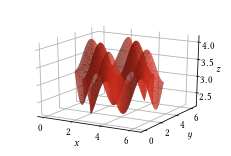

In [7]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 20
azim_ang = -60

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
#ax.set_xticks([-0.5,0,0.5,1])
#ax.set_yticks([0,0.5,1])
#ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-9)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)

ax.set_xlim(-0.31335,6.5965)
ax.set_ylim(-0.31351,6.5967)
ax.set_zlim(2.1417,4.1414)


ax.plot_trisurf(mf_xs[2],mf_ys[2],mf_zs[2],triangles=mf_tris[2],color=colormap[0],antialiased=True)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.1, bottom=0.025)
if savenewfigs:
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.pgf'.format(minseps[::2][2]),dpi=dpi)
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.png'.format(minseps[::2][2]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


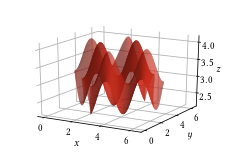

In [8]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 20
azim_ang = -60

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
#ax.set_xticks([-0.5,0,0.5,1])
#ax.set_yticks([0,0.5,1])
#ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-9)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)

ax.set_xlim(-0.31335,6.5965)
ax.set_ylim(-0.31351,6.5967)
ax.set_zlim(2.1417,4.1414)

ax.plot_trisurf(mf_xs[3],mf_ys[3],mf_zs[3],triangles=mf_tris[3],color=colormap[0],antialiased=True)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.1, bottom=0.025)
if savenewfigs:
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.pgf'.format(minseps[::2][3]),dpi=dpi)
    plt.savefig('generated_figs/sinusoidal/sinusoidal-minsep={}.png'.format(minseps[::2][3]),dpi=dpi)

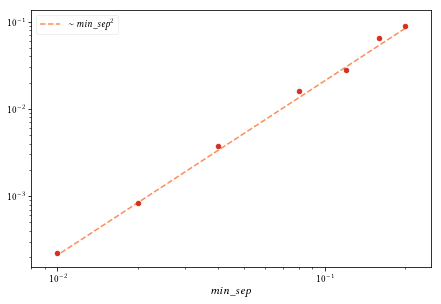

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)



#ax.axvline(1,linestyle=':',c=colormap[1])
if arne:
    ax.scatter(minseps,rms_errs,c = colormap[0],s=20)
    ax.plot(minseps,2.1*minseps**2,label='$\sim{}min\_sep^{2}$',c=colormap[1],linestyle='--',zorder=0)
elif simon:
    ax.scatter(minseps,abs_errs,c = colormap[0],s=20)
    ax.plot(minseps,1.6*minseps**2,label='$\sim{}min\_sep^{2}$',c=colormap[3],linestyle='--',zorder=0)
else:
    raise RuntimeError('GTFO')
ax.set_xscale('log')
ax.set_yscale('log')


leg = ax.legend()
leg.get_frame().set_facecolor((1.,1.,1.,0.))
leg.get_frame().set_alpha(0.3)

ax.set_xlim(8e-3,0.25)

#fig.subplots_adjust(hspace=0,wspace=0)
fig.subplots_adjust(left=0.065, right=0.99, top=0.99, bottom=0.1)
#ax.set_xlim(orig_xlim)
#ax.set_ylim(orig_ylim)



ax.set_xlabel(r'$min\_sep$',fontsize=12, labelpad=0)
#ax.set_ylabel(r'$\lambda_{3}$',fontsize=12)

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

#plt.tight_layout()
if savenewfigs:
    plt.savefig('generated_figs/sinusoidal/sinusoidal-errorscaling.pgf',dpi=dpi)
    plt.savefig('generated_figs/sinusoidal/sinusoidal-errorscaling.png',dpi=dpi)


## Manifold -> LCSCandidate

In [10]:
mf_x = np.load('manifold->lcs_candidate/mf_xs.npy')
mf_y = np.load('manifold->lcs_candidate/mf_ys.npy')
mf_z = np.load('manifold->lcs_candidate/mf_zs.npy')
mf_tri = np.load('manifold->lcs_candidate/mf_tris.npy')

lcs_x = np.load('manifold->lcs_candidate/lcs_xs.npy')
lcs_y = np.load('manifold->lcs_candidate/lcs_ys.npy')
lcs_z = np.load('manifold->lcs_candidate/lcs_zs.npy')
lcs_tri = np.load('manifold->lcs_candidate/lcs_tris.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


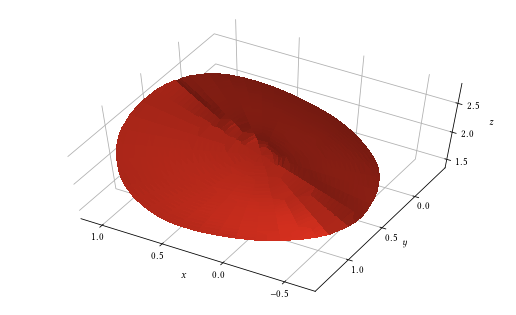

In [11]:
# Manifold
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 60
azim_ang = 120

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
ax.set_xticks([-0.5,0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=0)
ax.set_zlabel(r'$z$',labelpad=0)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)



ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,alpha=1,color=colormap[0],antialiased=False)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=1.025, top=1.02, bottom=0)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/manifold->candidate/conversion-mf-large.png',dpi=dpi)
    plt.savefig('generated_figs/manifold->candidate/conversion-mf-large.pgf',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


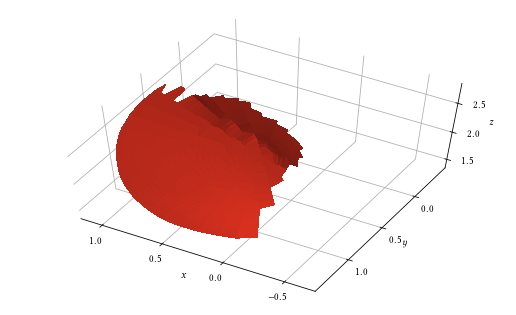

In [12]:
fig = plt.figure()
_ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 60
azim_ang = 120

_ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
_ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
_ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
_ax.tick_params(axis='all',which='major',labelsize=12)
_ax.tick_params(axis='all',which='minor',labelsize=10)
_ax.set_xticks([-0.5,0,0.5,1])
_ax.set_yticks([0,0.5,1])
_ax.set_zticks([1.5,2,2.5])
_ax.set_xlabel(r'$x$',labelpad=0)
_ax.set_ylabel(r'$y$',labelpad=0)
_ax.set_zlabel(r'$z$',labelpad=0)
_ax.set_xlim(ax.get_xlim())
_ax.set_ylim(ax.get_ylim())
_ax.set_zlim(ax.get_zlim())

for tickz in zip(ax.get_xaxis().get_major_ticks(),ax.get_yaxis().get_major_ticks(),ax.zaxis.get_major_ticks()):
    for tick in tickz:
        tick.set_pad(0.)


_ax.plot_trisurf(lcs_x,lcs_y,lcs_z,triangles=lcs_tri,alpha=1,color=colormap[0],antialiased=False)
_ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=1.025, top=1.02, bottom=0)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/manifold->candidate/conversion-lcs-large.png',dpi=dpi)
    plt.savefig('generated_figs/manifold->candidate/conversion-lcs-large.pgf',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


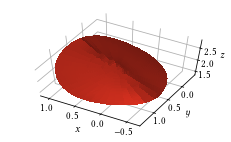

In [13]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 60
azim_ang = 120

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
ax.set_xticks([-0.5,0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_zticks([1.5,2,2.5])
ax.set_xlabel(r'$x$',labelpad=-3)
ax.set_ylabel(r'$y$',labelpad=-3)
ax.set_zlabel(r'$z$',labelpad=-8)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)




ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,alpha=1,color=colormap[0],antialiased=False)
ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.02, bottom=0.05)
if savenewfigs:
    plt.savefig('generated_figs/manifold->candidate/conversion-mf-small.png',dpi=dpi)
    plt.savefig('generated_figs/manifold->candidate/conversion-mf-small.pgf',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


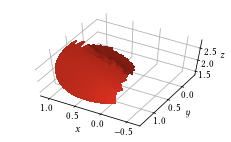

In [14]:
# Manifold
fig = plt.figure(figsize=(2.66,1.74))
_ax = fig.add_subplot(111,projection='3d',rasterized=True)
elev_ang = 60
azim_ang = 120

_ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
_ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
_ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
_ax.tick_params(axis='all',which='major',labelsize=12)
_ax.tick_params(axis='all',which='minor',labelsize=10)
_ax.set_xticks([-0.5,0,0.5,1])
_ax.set_yticks([0,0.5,1])
_ax.set_zticks([1.5,2,2.5])
_ax.set_xlabel(r'$x$',labelpad=-3)
_ax.set_ylabel(r'$y$',labelpad=-3)
_ax.set_zlabel(r'$z$',labelpad=-8)
_ax.set_xlim(ax.get_xlim())
_ax.set_ylim(ax.get_ylim())
_ax.set_zlim(ax.get_zlim())


for tick in _ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in _ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in _ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)




_ax.plot_trisurf(lcs_x,lcs_y,lcs_z,triangles=lcs_tri,alpha=1,color=colormap[0],antialiased=False)
_ax.view_init(elev=elev_ang,azim=azim_ang)
fig.subplots_adjust(left=-0.12, right=0.975, top=1.02, bottom=0.05)
if savenewfigs:
    plt.savefig('generated_figs/manifold->candidate/conversion-lcs-small.png',dpi=dpi)
    plt.savefig('generated_figs/manifold->candidate/conversion-lcs-small.pgf',dpi=dpi)

## Kuleskall

### - LCS

In [15]:
x = np.load('spherical_lcs/lcs_xs.npy')[0]
y = np.load('spherical_lcs/lcs_ys.npy')[0]
z = np.load('spherical_lcs/lcs_zs.npy')[0]
tris = np.load('spherical_lcs/lcs_tris.npy')[0]

### - Beregn avvik fra perfekt kuleflate m radius 1

In [16]:
devs = np.sum(np.array(np.array((x,y,z))**2),axis=0) - 1

In [17]:
print('Mean deviation:', devs.mean())
print('Min deviation:', devs.min())
print('Max deviation:', devs.max())

Mean deviation: -0.0021241569744357962
Min deviation: -0.0021494173024318997
Max deviation: -0.0020969260971575032


In [18]:
print('Mean square deviation:', (devs**2).mean())
print('Min square deviation:', (devs**2).min())
print('Max square deviation:', (devs**2).max())

Mean square deviation: 4.512421300351007e-06
Min square deviation: 4.397099056940199e-06
Max square deviation: 4.619994739993624e-06


In [19]:
print('Root mean square deviation:', np.sqrt((devs**2)).mean())
print('Root min square deviation:', np.sqrt((devs**2)).min())
print('Root max square deviation:', np.sqrt((devs**2)).max())

Root mean square deviation: 0.0021241569744357962
Root min square deviation: 0.0020969260971575032
Root max square deviation: 0.0021494173024318997


### - Plot LCS

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


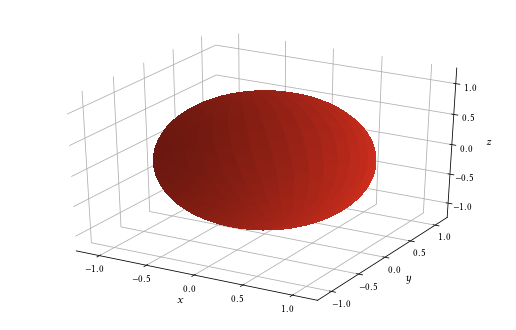

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.plot_trisurf(x,y,z,triangles=tris,antialiased=False,color=colormap[0])

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_zlim(-1.2,1.2)
ax.set_xlabel(r'$x$',fontsize=12,labelpad=0)
ax.set_ylabel(r'$y$',fontsize=12,labelpad=0)
ax.set_zlabel(r'$z$',fontsize=12,labelpad=0)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))

ax.tick_params(axis='all',which='major',labelsize=12,pad=5)
ax.tick_params(axis='all',which='minor',labelsize=10,pad=-5)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
#for tick in ax.get_yaxis().get_major_ticks():
#    tick.set_pad(0.)
    
#for tick in ax.zaxis.get_major_ticks():
#    tick.set_pad(0.)

fig.subplots_adjust(left=-0.12, right=1.025, top=1.075, bottom=0)

if savenewfigs:
    plt.savefig('generated_figs/bucketshell-lcs/spherical-lcs.pgf',dpi=dpi)
    plt.savefig('generated_figs/bucketshell-lcs/spherical-lcs.png',dpi=dpi)

### - Lambda3 sfa radius

#### (Lambda3 for gitt radius funnet ved aritmetisk snitt av alle lambda3 for samme radius)

In [21]:
radii = np.load('spherical_lcs/radii.npy')
lm3vals = np.load('spherical_lcs/lm3vals.npy')

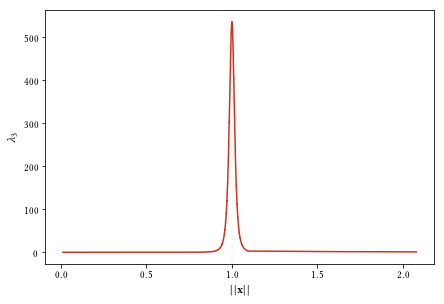

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.axvline(1,linestyle=':',c=colormap[3])
ax.plot(radii,lm3vals,c = colormap[0])





ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)


ax.set_xlabel(r'$||\mathbf{x}||$',fontsize=12, labelpad=3)

ax.set_ylabel(r'$\lambda_{3}$',fontsize=12)

#leg = ax.legend()
#leg.get_frame().set_facecolor((1.,1.,1.,0.))
#leg.get_frame().set_alpha(0.3)

#ax.set_xlim(8e-3,0.25)

#fig.subplots_adjust(hspace=0,wspace=0)
fig.subplots_adjust(left=0.09, right=0.99, top=0.99, bottom=0.11)
#ax.set_xlim(orig_xlim)
#ax.set_ylim(orig_ylim)


ax.patch.set_alpha(0.)
#plt.tight_layout()
if savenewfigs:
    plt.savefig('generated_figs/bucketshell-lcs/spherical-lm3-afo-radius.png',dpi=dpi)
    plt.savefig('generated_figs/bucketshell-lcs/spherical-lm3-afo-radius.pgf',dpi=dpi)

## Konvergenstester

In [23]:
x_coll, y_coll, z_coll, tri_coll = [], [], [], []

min_seps = [0.16, 0.08, 0.04, 0.01]

for m in min_seps:
    x_coll.append(np.load('convergence_test/xs_minsep={}.npy'.format(m)))
    y_coll.append(np.load('convergence_test/ys_minsep={}.npy'.format(m)))
    z_coll.append(np.load('convergence_test/zs_minsep={}.npy'.format(m)))
    tri_coll.append(np.load('convergence_test/tris_minsep={}.npy'.format(m)))

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


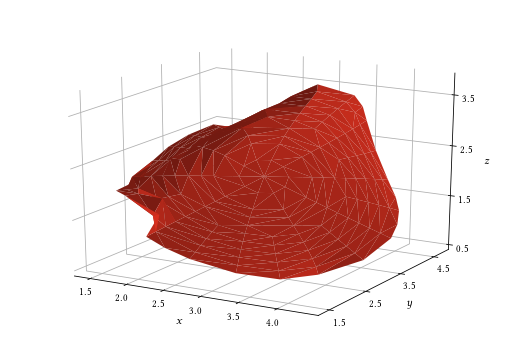

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax1.set_xlabel(r'$x$',fontsize=12,labelpad=0)
ax1.set_ylabel(r'$y$',fontsize=12,labelpad=0)
ax1.set_zlabel(r'$z$',fontsize=12,labelpad=0)
ax1.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax1.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax1.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax1.set_xticks([1.5,2,2.5,3,3.5,4])
ax1.set_yticks([1.5,2.5,3.5,4.5])
ax1.set_zticks([0.5,1.5,2.5,3.5])
ax1.view_init(azim=azim_ang,elev=elev_ang)
ax1.tick_params(axis='all',which='major',labelsize=12)
ax1.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax1.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax1.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax1.zaxis.get_major_ticks():
    tick.set_pad(0.)

ax1.plot_trisurf(x_coll[0],y_coll[0],z_coll[0],triangles=tri_coll[0],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.12, right=1.025, top=1.125, bottom=-0.05)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.pgf'.format(min_seps[0]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.png'.format(min_seps[0]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


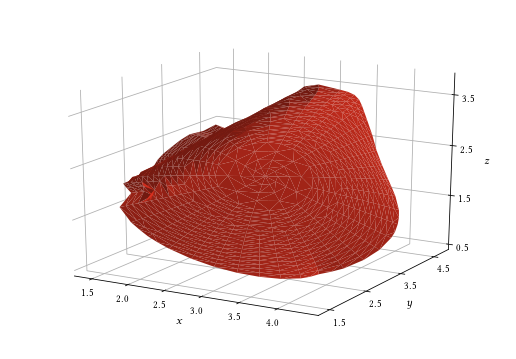

In [25]:
fig = plt.figure()
ax2 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax2.set_xlabel(r'$x$',fontsize=12,labelpad=0)
ax2.set_ylabel(r'$y$',fontsize=12,labelpad=0)
ax2.set_zlabel(r'$z$',fontsize=12,labelpad=0)
ax2.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax2.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax2.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax2.set_xticks([1.5,2,2.5,3,3.5,4])
ax2.set_yticks([1.5,2.5,3.5,4.5])
ax2.set_zticks([0.5,1.5,2.5,3.5])
ax2.view_init(azim=azim_ang,elev=elev_ang)
ax2.tick_params(axis='all',which='major',labelsize=12)
ax2.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax2.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax2.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax2.zaxis.get_major_ticks():
    tick.set_pad(0.)

ax2.plot_trisurf(x_coll[1],y_coll[1],z_coll[1],triangles=tri_coll[1],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.12, right=1.025, top=1.125, bottom=-0.05)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.pgf'.format(min_seps[1]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.png'.format(min_seps[1]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


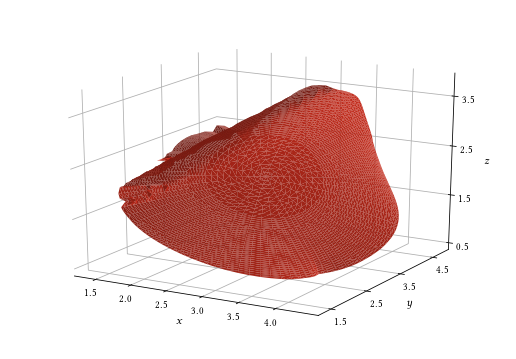

In [26]:
fig = plt.figure()
ax3 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax3.set_xlabel(r'$x$',fontsize=12,labelpad=0)
ax3.set_ylabel(r'$y$',fontsize=12,labelpad=0)
ax3.set_zlabel(r'$z$',fontsize=12,labelpad=0)
ax3.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax3.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax3.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax3.set_xticks([1.5,2,2.5,3,3.5,4])
ax3.set_yticks([1.5,2.5,3.5,4.5])
ax3.set_zticks([0.5,1.5,2.5,3.5])
ax3.view_init(azim=azim_ang,elev=elev_ang)
ax3.tick_params(axis='all',which='major',labelsize=12)
ax3.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax3.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax3.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax3.zaxis.get_major_ticks():
    tick.set_pad(0.)

ax3.plot_trisurf(x_coll[2],y_coll[2],z_coll[2],triangles=tri_coll[2],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.12, right=1.025, top=1.125, bottom=-0.05)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.pgf'.format(min_seps[2]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.png'.format(min_seps[2]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


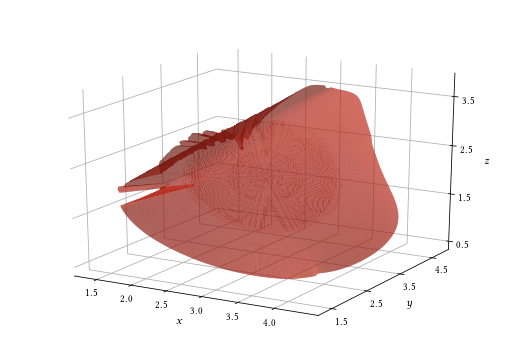

In [27]:
fig = plt.figure()
ax4 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax4.set_xlabel(r'$x$',fontsize=12,labelpad=0)
ax4.set_ylabel(r'$y$',fontsize=12,labelpad=0)
ax4.set_zlabel(r'$z$',fontsize=12,labelpad=0)
ax4.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax4.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax4.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax4.set_xticks([1.5,2,2.5,3,3.5,4])
ax4.set_yticks([1.5,2.5,3.5,4.5])
ax4.set_zticks([0.5,1.5,2.5,3.5])
ax4.view_init(azim=azim_ang,elev=elev_ang)
ax4.tick_params(axis='all',which='major',labelsize=12)
ax4.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax4.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax4.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax4.zaxis.get_major_ticks():
    tick.set_pad(0.)

ax4.plot_trisurf(x_coll[3],y_coll[3],z_coll[3],triangles=tri_coll[3],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.12, right=1.025, top=1.125, bottom=-0.05)
if savenewfigs and largefigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.pgf'.format(min_seps[3]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-large.png'.format(min_seps[3]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


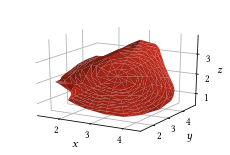

In [28]:
fig = plt.figure(figsize=(2.66,1.74))
ax1 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax1.set_xlabel(r'$x$',fontsize=12,labelpad=-3)
ax1.set_ylabel(r'$y$',fontsize=12,labelpad=-3)
ax1.set_zlabel(r'$z$',fontsize=12,labelpad=-8)
ax1.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax1.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax1.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax1.set_xticks([2,3,4])
ax1.set_yticks([2,3,4])
ax1.set_zticks([1,2,3])
ax1.view_init(azim=azim_ang,elev=elev_ang)
ax1.tick_params(axis='all',which='major',labelsize=12)
ax1.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax1.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax1.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax1.zaxis.get_major_ticks():
    tick.set_pad(-2.)

ax1.plot_trisurf(x_coll[0],y_coll[0],z_coll[0],triangles=tri_coll[0],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.1, right=0.99, top=1.1, bottom=0.03)
if savenewfigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.pgf'.format(min_seps[0]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.png'.format(min_seps[0]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


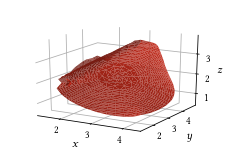

In [29]:
fig = plt.figure(figsize=(2.66,1.74))
ax2 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax2.set_xlabel(r'$x$',fontsize=12,labelpad=-3)
ax2.set_ylabel(r'$y$',fontsize=12,labelpad=-3)
ax2.set_zlabel(r'$z$',fontsize=12,labelpad=-8)
ax2.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax2.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax2.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax2.set_xticks([2,3,4])
ax2.set_yticks([2,3,4])
ax2.set_zticks([1,2,3])
ax2.view_init(azim=azim_ang,elev=elev_ang)
ax2.tick_params(axis='all',which='major',labelsize=12)
ax2.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax2.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax2.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax2.zaxis.get_major_ticks():
    tick.set_pad(-2.)

ax2.plot_trisurf(x_coll[1],y_coll[1],z_coll[1],triangles=tri_coll[1],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.1, right=0.99, top=1.1, bottom=0.03)
if savenewfigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.pgf'.format(min_seps[1]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.png'.format(min_seps[1]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


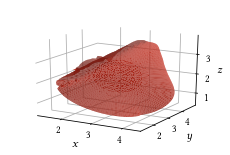

In [30]:
fig = plt.figure(figsize=(2.66,1.74))
ax3 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax3.set_xlabel(r'$x$',fontsize=12,labelpad=-3)
ax3.set_ylabel(r'$y$',fontsize=12,labelpad=-3)
ax3.set_zlabel(r'$z$',fontsize=12,labelpad=-8)
ax3.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax3.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax3.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax3.set_xticks([2,3,4])
ax3.set_yticks([2,3,4])
ax3.set_zticks([1,2,3])
ax3.view_init(azim=azim_ang,elev=elev_ang)
ax3.tick_params(axis='all',which='major',labelsize=12)
ax3.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax3.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax3.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax3.zaxis.get_major_ticks():
    tick.set_pad(-2.)

ax3.plot_trisurf(x_coll[2],y_coll[2],z_coll[2],triangles=tri_coll[2],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.1, right=0.99, top=1.1, bottom=0.03)
if savenewfigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.pgf'.format(min_seps[2]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.png'.format(min_seps[2]),dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


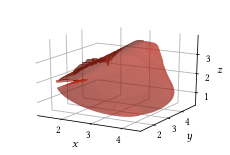

In [31]:
fig = plt.figure(figsize=(2.66,1.74))
ax4 = fig.add_subplot(111,projection='3d',rasterized=True)
azim_ang = -60
elev_ang = 20

ax4.set_xlabel(r'$x$',fontsize=12,labelpad=-3)
ax4.set_ylabel(r'$y$',fontsize=12,labelpad=-3)
ax4.set_zlabel(r'$z$',fontsize=12,labelpad=-8)
ax4.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax4.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax4.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax4.set_xticks([2,3,4])
ax4.set_yticks([2,3,4])
ax4.set_zticks([1,2,3])
ax4.view_init(azim=azim_ang,elev=elev_ang)
ax4.tick_params(axis='all',which='major',labelsize=12)
ax4.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax4.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax4.get_yaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax4.zaxis.get_major_ticks():
    tick.set_pad(-2.)

ax4.plot_trisurf(x_coll[3],y_coll[3],z_coll[3],triangles=tri_coll[3],antialiased=True,color=colormap[0])

fig.subplots_adjust(left=-0.1, right=0.99, top=1.1, bottom=0.03)
if savenewfigs:
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.pgf'.format(min_seps[3]),dpi=dpi)
    plt.savefig('generated_figs/convergence-tests/convergence-minsep={}-small.png'.format(min_seps[3]),dpi=dpi)

## Trajectory-verifikasjon

In [32]:
mf_x = np.load('trajectory_verification/mf_xs.npy')
mf_y = np.load('trajectory_verification/mf_ys.npy')
mf_z = np.load('trajectory_verification/mf_zs.npy')
mf_tri = np.load('trajectory_verification/mf_tris.npy')

notforcedout = np.load('trajectory_verification/trajectories_outwards=False.npy')
forcedout = np.load('trajectory_verification/trajectories_outwards=True.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


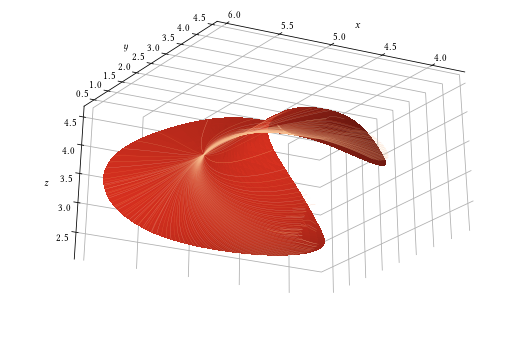

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
azim_ang = -60
elev_ang = 20
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-1)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-2)

ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(3.25)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)

elev_ang = -30
azim_ang = 60
ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,color=colormap[0],antialiased=False,zorder=0)
for j, traj in enumerate(notforcedout):
    ax.plot(traj[...,0],traj[...,1],traj[...,2],c=colormap[1:][divmod(j,3)[1]],lw=0.25,alpha=0.5,zorder=0)
ax.view_init(elev=elev_ang,azim=azim_ang)

fig.subplots_adjust(left=-0.075, right=1.1, top=1, bottom=-0.1)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/trajectory-verification/verification-notforced-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/trajectory-verification/verification-notforced-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


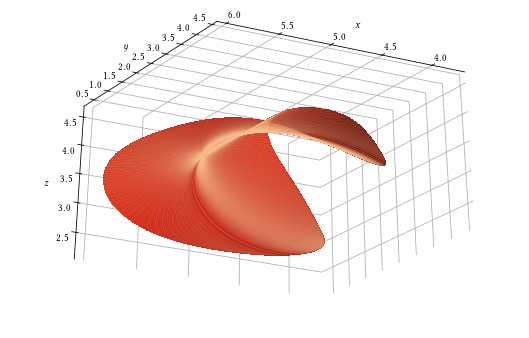

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-1)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-2)

ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(3.25)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)

elev_ang = -30
azim_ang = 60
ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,color=colormap[0],antialiased=False,zorder=0)
for j, traj in enumerate(forcedout):
    ax.plot(traj[...,0],traj[...,1],traj[...,2],c=colormap[1:][divmod(j,3)[1]],lw=0.25,alpha=0.5,zorder=2)
ax.view_init(elev=elev_ang,azim=azim_ang)

fig.subplots_adjust(left=-0.075, right=1.1, top=1, bottom=-0.1)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/trajectory-verification/verification-forced-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/trajectory-verification/verification-forced-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


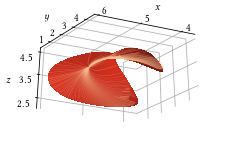

In [35]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-4)
ax.set_xticks([4,5,6])
ax.set_zticks([2.5,3.5,4.5])


ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(1.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)

elev_ang = -30
azim_ang = 60
ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,color=colormap[0],antialiased=False,zorder=0)
for j, traj in enumerate(notforcedout):
    ax.plot(traj[...,0],traj[...,1],traj[...,2],c=colormap[1:][divmod(j,3)[1]],lw=0.25,alpha=0.5,zorder=2)
ax.view_init(elev=elev_ang,azim=azim_ang)

fig.subplots_adjust(left=0.025, right=1.1, top=0.9, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/trajectory-verification/verification-notforced-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/trajectory-verification/verification-notforced-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


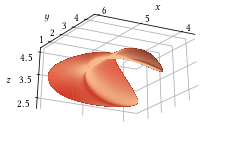

In [36]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-4)
ax.set_xticks([4,5,6])
ax.set_zticks([2.5,3.5,4.5])


ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(1.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)

elev_ang = -30
azim_ang = 60
ax.plot_trisurf(mf_x,mf_y,mf_z,triangles=mf_tri,color=colormap[0],antialiased=False,zorder=0)
for j, traj in enumerate(forcedout):
    ax.plot(traj[...,0],traj[...,1],traj[...,2],c=colormap[1:][divmod(j,3)[1]],lw=0.25,alpha=0.5,zorder=2)
ax.view_init(elev=elev_ang,azim=azim_ang)

fig.subplots_adjust(left=0.025, right=1.1, top=0.9, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/trajectory-verification/verification-forced-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/trajectory-verification/verification-forced-small.png',dpi=dpi)

## Blobtest

### Advektert fra t = 0 til t = 5

In [37]:
initial_above_x = np.load('blob_test/initial_upper_xs.npy')
initial_above_y = np.load('blob_test/initial_upper_ys.npy')
initial_above_z = np.load('blob_test/initial_upper_zs.npy')

initial_below_x = np.load('blob_test/initial_lower_xs.npy')
initial_below_y = np.load('blob_test/initial_lower_ys.npy')
initial_below_z = np.load('blob_test/initial_lower_zs.npy')

initial_lcs_x = np.load('blob_test/LCS_xs.npy')
initial_lcs_y = np.load('blob_test/LCS_ys.npy')
initial_lcs_z = np.load('blob_test/LCS_zs.npy')
initial_lcs_tri = np.load('blob_test/LCS_triangulations.npy')

In [38]:
final_above_x = np.load('blob_test/advected_upper_xs.npy')
final_above_y = np.load('blob_test/advected_upper_ys.npy')
final_above_z = np.load('blob_test/advected_upper_zs.npy')

final_below_x = np.load('blob_test/advected_lower_xs.npy')
final_below_y = np.load('blob_test/advected_lower_ys.npy')
final_below_z = np.load('blob_test/advected_lower_zs.npy')

lcs_final_x = np.load('blob_test/advected_middle_xs.npy')
lcs_final_y = np.load('blob_test/advected_middle_ys.npy')
lcs_final_z = np.load('blob_test/advected_middle_zs.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


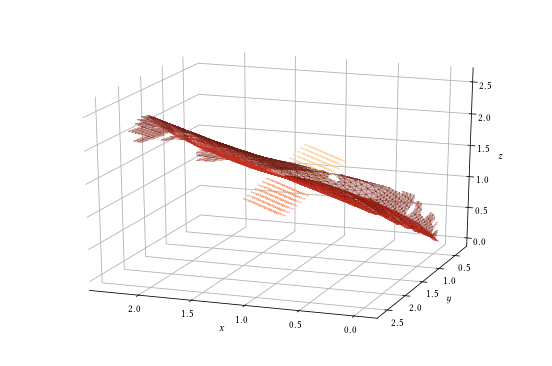

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-1)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-2)

ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)

elev_ang = 20
azim_ang = 110
ax.plot_trisurf(initial_lcs_x, initial_lcs_y, initial_lcs_z, triangles = initial_lcs_tri, 
                 color=colormap[0], alpha=0.3,antialiased = False,zorder=0)
ax.scatter(initial_above_x, initial_above_y, initial_above_z, facecolors= colormap[1],c = colormap[1],marker='o',s=0.5,zorder=0)
ax.scatter(initial_below_x, initial_below_y, initial_below_z, c = colormap[2],marker='o',s=0.5,zorder=0)
ax.view_init(elev=elev_ang, azim=azim_ang)

fig.subplots_adjust(left=-0.15, right=1.08, top=1.125, bottom=-0.075)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/blobtest/blobtest-pre-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/blobtest/blobtest-pre-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


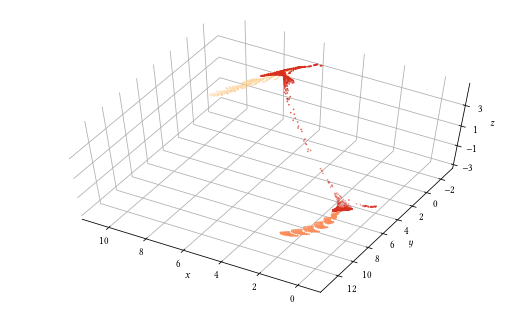

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_zticks([-3,-1,1,3])
ax.set_xlabel(r'$x$',labelpad=-1)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-4)

#ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0)#(3.25)
    

elev_ang = 60
azim_ang = 120
ax.scatter(lcs_final_x, lcs_final_y, lcs_final_z, c = colormap[0],marker='o',s=0.5,zorder=0)
ax.scatter(final_above_x, final_above_y, final_above_z, c = colormap[1],marker='o',s=0.5,zorder=0)
ax.scatter(final_below_x, final_below_y, final_below_z, c = colormap[2],marker='o',s=0.5,zorder=0)
ax.view_init(elev=elev_ang, azim=azim_ang)

fig.subplots_adjust(left=-0.125, right=1.04, top=1.025, bottom=0)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/blobtest/blobtest-post-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/blobtest/blobtest-post-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


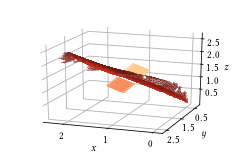

In [41]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-5)
ax.set_xticks([0,1,2])
ax.set_yticks([0.5,1.5,2.5])
ax.set_zticks([0.5,1,1.5,2,2.5])

ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-1.)

elev_ang = 20
azim_ang = 110
ax.plot_trisurf(initial_lcs_x, initial_lcs_y, initial_lcs_z, triangles = initial_lcs_tri, 
                 color=colormap[0], alpha=0.3,antialiased = False,zorder=0)
ax.scatter(initial_above_x, initial_above_y, initial_above_z, facecolors= colormap[1],c = colormap[1],marker='o',s=0.5,zorder=0)
ax.scatter(initial_below_x, initial_below_y, initial_below_z, c = colormap[2],marker='o',s=0.5,zorder=0)
ax.view_init(elev=elev_ang, azim=azim_ang)

fig.subplots_adjust(left=-0.15, right=1, top=1.125, bottom=0.02)

if savenewfigs:
    plt.savefig('generated_figs/blobtest/blobtest-pre-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/blobtest/blobtest-pre-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


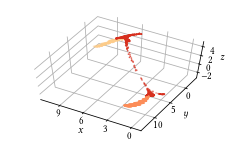

In [42]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-6)
ax.set_ylabel(r'$y$',labelpad=-6)
ax.set_zlabel(r'$z$',labelpad=-9)
ax.set_xticks([0,3,6,9])
ax.set_yticks([0,5,10])
#ax.set_zticks([0.5,1,1.5,2,2.5])

ax.view_init(azim=azim_ang,elev=elev_ang)
ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-5.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-5)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)

elev_ang = 60
azim_ang = 120
ax.scatter(lcs_final_x, lcs_final_y, lcs_final_z, c = colormap[0],marker='o',s=0.5,zorder=0)
ax.scatter(final_above_x, final_above_y, final_above_z, c = colormap[1],marker='o',s=0.5,zorder=0)
ax.scatter(final_below_x, final_below_y, final_below_z, c = colormap[2],marker='o',s=0.5,zorder=0)
ax.view_init(elev=elev_ang, azim=azim_ang)

fig.subplots_adjust(left=-0.125, right=0.98, top=1.025, bottom=0.02)

if savenewfigs:
    plt.savefig('generated_figs/blobtest/blobtest-post-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/blobtest/blobtest-post-small.png',dpi=dpi)

## LCS for tidsuavh ABC-strømning

In [43]:
struc1 = np.load('timeindependent_abc_lcs/indep_structure_1.npy')
struc2 = np.load('timeindependent_abc_lcs/indep_structure_2.npy')

lcs_x = np.load('timeindependent_abc_lcs/xs.npy')
lcs_y = np.load('timeindependent_abc_lcs/ys.npy')
lcs_z = np.load('timeindependent_abc_lcs/zs.npy')
lcs_tri = np.load('timeindependent_abc_lcs/tris.npy')
elev_ang_config = [88,0,2,45]
azim_ang_config = [-90,-90,180,45]

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


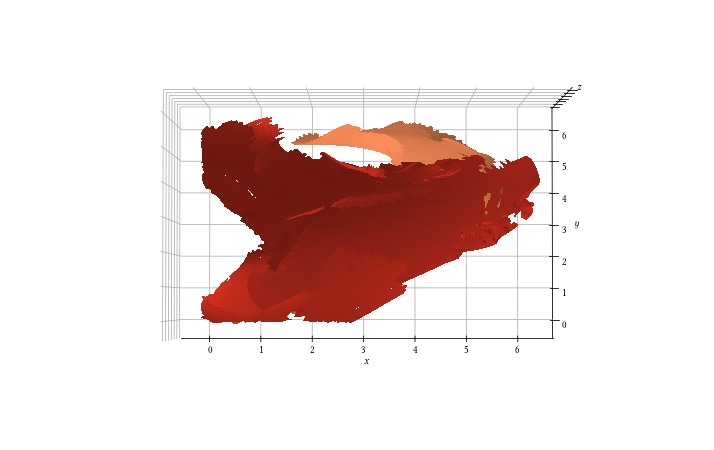

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)
#ax.set_rasterization_zorder(1)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=8)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-8)

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1],zorder=0) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0],zorder=0)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[0],azim=azim_ang_config[0])

fig.subplots_adjust(left=-0.33, right=1.275, top=1.25, bottom=-0.24)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view1-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view1-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


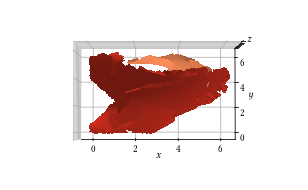

In [45]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=-8)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-2.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[0],azim=azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.2, bottom=-0.15)

if savenewfigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view1-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


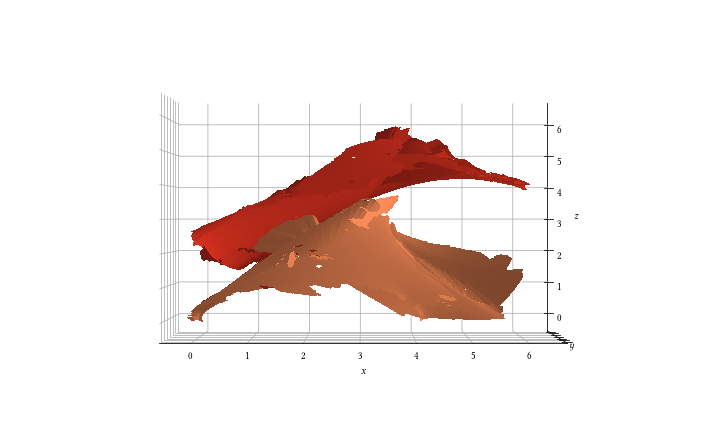

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=8)
ax.set_ylabel(r'$y$',labelpad=-10)
ax.set_zlabel(r'$z$',labelpad=3)
ax.set_zticks([0,1,2,3,4,5,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(2.)
    
ax.set_yticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[1],azim=azim_ang_config[1])

fig.subplots_adjust(left=-0.33, right=1.26, top=1.275, bottom=-0.2)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view2-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view2-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


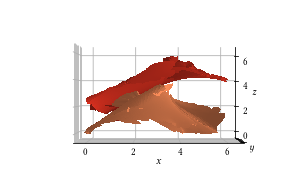

In [47]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-2)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=-5)

ax.set_xticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_yticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[1],azim=azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view2-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


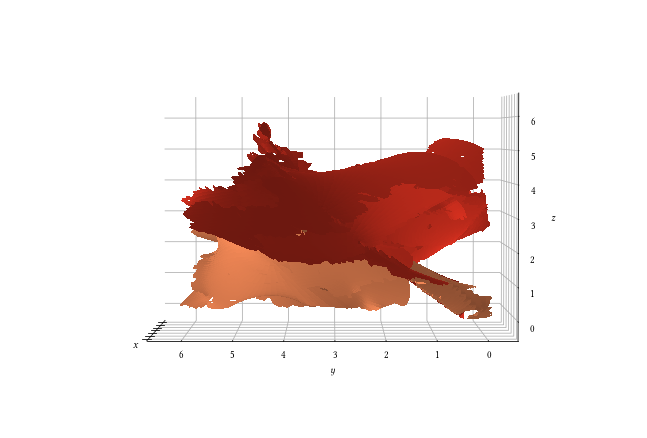

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-5)
ax.set_ylabel(r'$y$',labelpad=8)
ax.set_zlabel(r'$z$',labelpad=3)
ax.set_zticks([0,1,2,3,4,5,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(2.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[2],azim=azim_ang_config[2])

fig.subplots_adjust(left=-0.275, right=1.175, top=1.275, bottom=-0.175)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view3-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view3-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


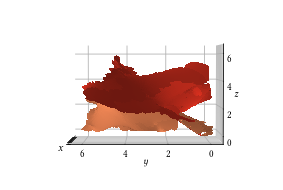

In [49]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-12)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[2],azim=azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.15, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view3-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


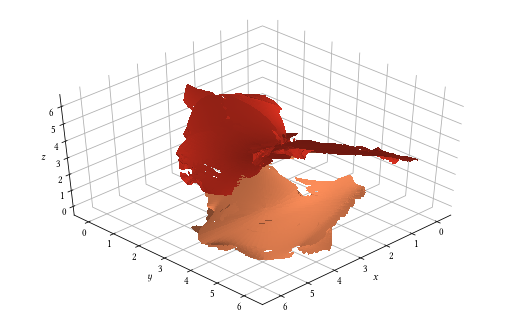

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-3)
ax.set_ylabel(r'$y$',labelpad=-3)
ax.set_zlabel(r'$z$',labelpad=-8)
ax.set_zticks([0,1,2,3,4,5,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)
    
#ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[3],azim=azim_ang_config[3])

fig.subplots_adjust(left=-0.06, right=1.075, top=1.05, bottom=0)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view4-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view4-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


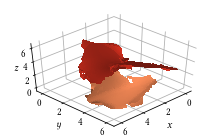

In [51]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

#ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in struc2:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_x[i],lcs_y[i],lcs_z[i],triangles=lcs_tri[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_zlim(ax.get_xlim())
ax.view_init(elev=elev_ang_config[3],azim=azim_ang_config[3])

fig.subplots_adjust(left=0, right=1.05, top=1, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timeindepABC-lcs/indep-lcss-view4-small.png',dpi=dpi)

## ABD-domene for tidsuavh ABC-strømning

In [52]:
indep_ab_pts= np.load('abd-domains/abd_domain_timeindep.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


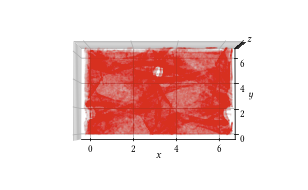

In [53]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=-8)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(indep_ab_pts[...,0],indep_ab_pts[...,1],indep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-2.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[0],azim=azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.2, bottom=-0.15)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view1-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


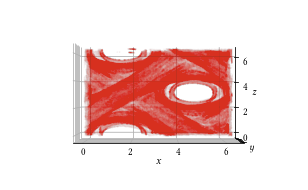

In [54]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-2)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=-5)

ax.set_xticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(indep_ab_pts[...,0],indep_ab_pts[...,1],indep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_yticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[1],azim=azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view2-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


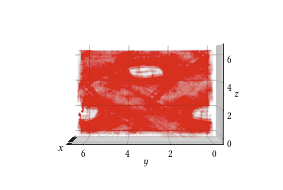

In [55]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-12)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(indep_ab_pts[...,0],indep_ab_pts[...,1],indep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=elev_ang_config[2],azim=azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.15, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view3-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


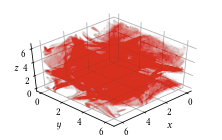

In [56]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

#ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(indep_ab_pts[...,0],indep_ab_pts[...,1],indep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_zlim(ax.get_xlim())
ax.view_init(elev=elev_ang_config[3],azim=azim_ang_config[3])

fig.subplots_adjust(left=0, right=1.05, top=1, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/indep-abd-domain-view4-small.png',dpi=dpi)

## LCS for tidsavh ABC-strømning

### -Plot tidsutvikling av B- og C-koeff

In [57]:
t = np.linspace(0,5,2000)
a0 = np.sqrt(3)
b0 = np.sqrt(2)
c0 = 1

k0 = 0.3
k1 = 0.5
k2 = 1.5
k3 = 1.8

B = b0*(1 + k0*np.tanh(k1*t)*np.cos((k2*t)**2))
C = c0*(1 + k0*np.tanh(k1*t)*np.sin((k3*t)**2))

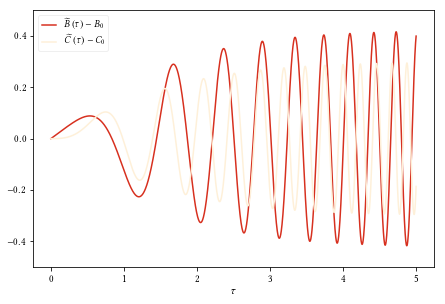

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t,B-b0,label=r'$\widetilde{B}\,(\tau)-B_{0}$',color=colormap[0],linestyle='-')
ax.plot(t,C-c0,label=r'$\widetilde{C}\,(\tau)-C_{0}$',color=colormap[3],linestyle='-')


#ax.set_ylabel(r'$\lambda_{3}$')

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.set_xlabel(r'$\tau$',fontsize=12,labelpad=0)

leg = ax.legend(loc='best',fontsize=10,markerscale=1,handlelength=1.4)
leg.get_frame().set_alpha(0.3)
leg.get_frame().set_facecolor((1.,1.,1.,0.))

ax.patch.set_alpha(0.)
ax.set_ylim(-0.5,0.5)
fig.subplots_adjust(left=0.06, right=0.99, top=0.99, bottom=0.1)
#plt.tight_layout()
if savenewfigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-bc-coeff.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-bc-coeff.png',dpi=dpi)

## Plott LCSer

In [59]:
lcs_xs = np.load('timedependent_abc_lcs/xs.npy')
lcs_ys = np.load('timedependent_abc_lcs/ys.npy')
lcs_zs = np.load('timedependent_abc_lcs/zs.npy')
lcs_tris = np.load('timedependent_abc_lcs/tris.npy')

_struc1 = np.load('timedependent_abc_lcs/dep_structure_1.npy')
_struc2 = np.load('timedependent_abc_lcs/dep_structure_2.npy')
_struc3 = np.load('timedependent_abc_lcs/dep_structure_3.npy')
_elev_ang_config = [88,0,2,45]
_azim_ang_config = [-90,-90,180,45]

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


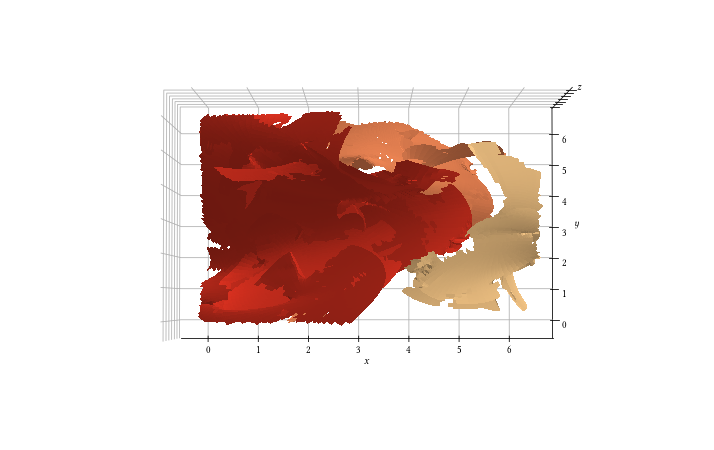

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=8)
ax.set_ylabel(r'$y$',labelpad=-1)
ax.set_zlabel(r'$z$',labelpad=-8)

ax.set_zticks([0,1,2,3,4,5,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)


for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2]) 
    
for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0],rasterized=True)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.33, right=1.275, top=1.25, bottom=-0.24)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view1-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view1-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


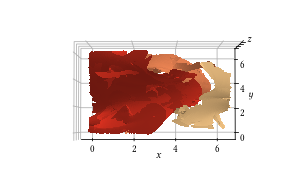

In [61]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=-8)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2],zorder=0)

for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1],zorder=0) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0],zorder=0)

    
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-2.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_rasterization_zorder(1)
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.2, bottom=-0.15)

if savenewfigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view1-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


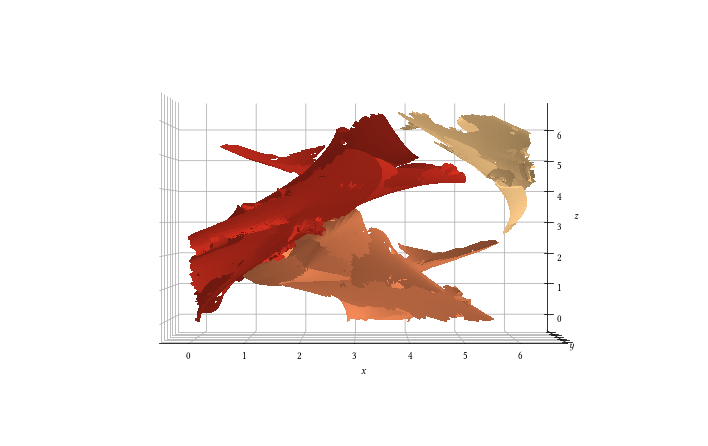

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=8)
ax.set_ylabel(r'$y$',labelpad=-10)
ax.set_zlabel(r'$z$',labelpad=3)
ax.set_zticks([0,1,2,3,4,5,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2]) 
    
for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(2.)
    
ax.set_yticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[1],azim=_azim_ang_config[1])

fig.subplots_adjust(left=-0.33, right=1.26, top=1.275, bottom=-0.2)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view2-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view2-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


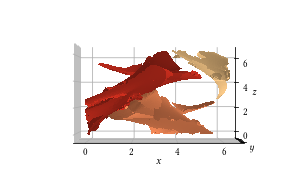

In [63]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-2)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=-5)

ax.set_xticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2])

for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_yticklabels([])
#ax.set_zrange(ax.get_xrange())
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[1],azim=_azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view2-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


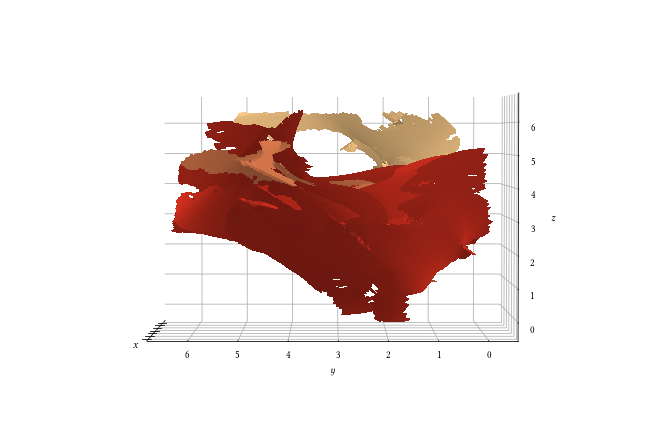

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-5)
ax.set_ylabel(r'$y$',labelpad=8)
ax.set_zlabel(r'$z$',labelpad=3)
#ax.set_yticks([1,2,3,4,5])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2]) 

for i in struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(0)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(2.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[2],azim=_azim_ang_config[2])

fig.subplots_adjust(left=-0.275, right=1.175, top=1.275, bottom=-0.175)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss_view3_large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss_view3_large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


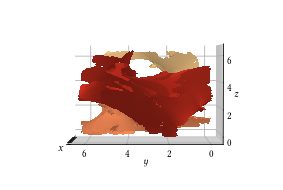

In [65]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-12)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2]) 

for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())
ax.view_init(elev=_elev_ang_config[2],azim=_azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.15, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view3-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


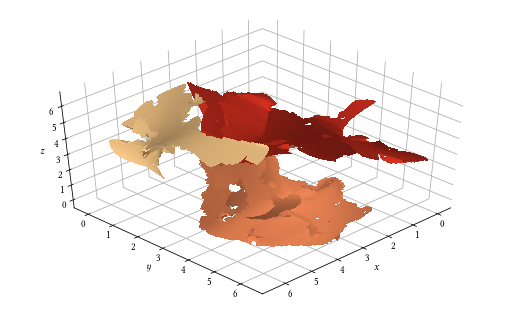

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-3)
ax.set_ylabel(r'$y$',labelpad=-3)
ax.set_zlabel(r'$z$',labelpad=-8)
#ax.set_yticks([1,2,3,4,5])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2]) 

for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-3.)
    
#ax.set_xticklabels([])

ax.view_init(elev=_elev_ang_config[3],azim=_azim_ang_config[3])
ax.set_zlim(ax.get_xlim())
fig.subplots_adjust(left=-0.06, right=1.075, top=1.01, bottom=0)

if savenewfigs and largefigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view4-large.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view4-large.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


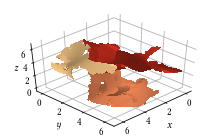

In [67]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

#ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

for i in _struc3:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[2])

for i in _struc2:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[1]) 
    
for i in _struc1:
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,color=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    

ax.view_init(elev=_elev_ang_config[3],azim=_azim_ang_config[3])
ax.set_zlim(ax.get_xlim())
fig.subplots_adjust(left=0, right=1.05, top=1, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/timedepABC-lcs/dep-lcss-view4-small.png',dpi=dpi)

## ABD-domene for tidsavh. ABC

In [68]:
dep_ab_pts= np.load('abd-domains/abd_domain_timedep.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


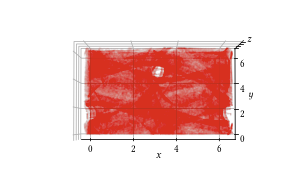

In [69]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=-8)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(dep_ab_pts[...,0],dep_ab_pts[...,1],dep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)
    
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-2.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_rasterization_zorder(1)
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.2, bottom=-0.15)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view1-small.png',dpi=dpi)

## ABD-domene for tidsavh. ABC

In [70]:
dep_ab_pts= np.load('abd-domains/abd_domain_timedep.npy')

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


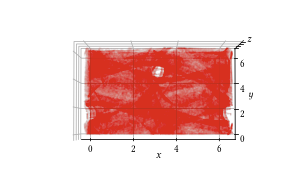

In [71]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=0)
ax.set_ylabel(r'$y$',labelpad=-8)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([0,2,4,6])
ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(dep_ab_pts[...,0],dep_ab_pts[...,1],dep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)
    
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-2.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_rasterization_zorder(1)
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.2, bottom=-0.15)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view1-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


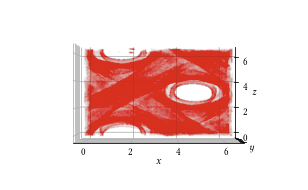

In [72]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-2)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=-5)

ax.set_xticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(dep_ab_pts[...,0],dep_ab_pts[...,1],dep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_yticklabels([])
#ax.set_zrange(ax.get_xrange())
ax.set_zlim(ax.get_xlim())

ax.view_init(elev=_elev_ang_config[1],azim=_azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.2, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view2-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


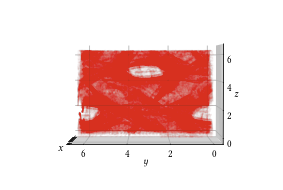

In [73]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-12)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(dep_ab_pts[...,0],dep_ab_pts[...,1],dep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    
ax.set_xticklabels([])
ax.set_zlim(ax.get_xlim())
ax.view_init(elev=_elev_ang_config[2],azim=_azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.15, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view3-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


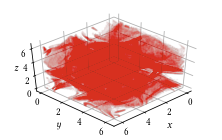

In [74]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-4)
ax.set_ylabel(r'$y$',labelpad=-4)
ax.set_zlabel(r'$z$',labelpad=-12)

#ax.set_yticks([0,2,4,6])
ax.set_zticks([0,2,4,6])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(dep_ab_pts[...,0],dep_ab_pts[...,1],dep_ab_pts[...,2],c=colormap[0],marker='.',alpha=0.01,s=3)

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-4.)
    

ax.view_init(elev=_elev_ang_config[3],azim=_azim_ang_config[3])
ax.set_zlim(ax.get_xlim())
fig.subplots_adjust(left=0, right=1.05, top=1, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/abd-domains/dep-abd-domain-view4-small.png',dpi=dpi)

## Plotte LCS i fjord

In [75]:
lcs_xs = np.load('fjord/x.npy')
lcs_ys = np.load('fjord/y.npy')
lcs_zs = np.load('fjord/z.npy')
lcs_tris = np.load('fjord/tri.npy')
lcs_lm3 = np.load('fjord/lm3.npy')

_elev_ang_config = [88,0,2,45]
_azim_ang_config = [-90,-90,180,45]

In [76]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=7)
ax.set_ylabel(r'$y$',labelpad=7)
ax.set_zlabel(r'$z$',labelpad=-13.5)

ax.set_xticks([8900,9100,9300])
ax.set_yticks([11800,12000,12200])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

 
for i in range(len(lcs_xs)):
    scalar = np.log(lcs_lm3[i])/np.log(np.amax(lcs_lm3))
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,
                          color=cmap(scalar),zorder=0) 
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(5)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.11, top=1.2, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-lcss-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-lcss-view1-small.png',dpi=dpi)
plt.close(fig)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


In [77]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=2)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=5)

ax.set_xticks([8900,9100,9300])
ax.set_zticks([100,150,200,250])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

 
for i in range(len(lcs_xs)):
    scalar = np.log(lcs_lm3[i])/np.log(np.amax(lcs_lm3))
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,
                          color=cmap(scalar),zorder=0) 
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(5)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(5.)
    
ax.set_yticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[1],azim=_azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.13, top=1.25, bottom=-0.07)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-lcss-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-lcss-view2-small.png',dpi=dpi)
plt.close(fig)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


In [78]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-13)
ax.set_ylabel(r'$y$',labelpad=0)
ax.set_zlabel(r'$z$',labelpad=-2)

ax.set_yticks([11800,12000,12200])
ax.set_zticks([100,150,200,250])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
 
for i in range(len(lcs_xs)):
    scalar = np.log(lcs_lm3[i])/np.log(np.amax(lcs_lm3))
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,
                          color=cmap(scalar),zorder=0) 
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-3)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_xticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[2],azim=_azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.07, top=1.2, bottom=-0.05)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-lcss-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjordlcss-view3-small.png',dpi=dpi)
plt.close(fig)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


In [79]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)
ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-3)
ax.set_ylabel(r'$y$',labelpad=-3)

ax.set_yticks([11800,12000,12200])
ax.set_xticks([8900,9100,9300])
ax.set_zticks([100,150,200,250])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.text(9420,11500,70,r'$z$', fontsize=10)

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
 
for i in range(len(lcs_xs)):
    scalar = np.log(lcs_lm3[i])/np.log(np.amax(lcs_lm3))
    ax.plot_trisurf(lcs_xs[i],lcs_ys[i],lcs_zs[i],triangles=lcs_tris[i],alpha=1,antialiased=False,
                          color=cmap(scalar),zorder=0) 

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-2.)
    
ax.view_init(elev=_elev_ang_config[3],azim=_azim_ang_config[3])
fig.subplots_adjust(left=0.04, right=1.05, top=1.05, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-lcss-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-lcss-view4-small.png',dpi=dpi)
plt.close(fig)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


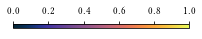

In [86]:
fig = plt.figure(figsize=(2.66,0.3))
ax=fig.add_subplot(111)

#sm = mpl.cm.ScalarMappable(cmap = cmap, norm = mpl.pyplot.Normalize(vmin=0,vmax=1))
#sm._A = []

cb = mpl.colorbar.ColorbarBase(ax=ax,cmap=cmap,norm=mpl.colors.Normalize(vmin=0,vmax=1),orientation='horizontal')
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.subplots_adjust(left=0.04, right=0.96, top=0.25, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-lcs-colorbar.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-lcs-colorbar.png',dpi=dpi)

## ABD-domene i fjord

In [81]:
points = np.load('fjord/abd-domain.npy')

_elev_ang_config = [88,0,2,45]
_azim_ang_config = [-90,-90,180,45]

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


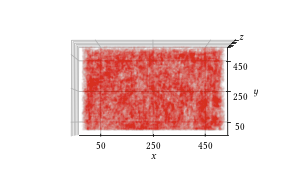

In [82]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=7)
ax.set_ylabel(r'$y$',labelpad=2)
ax.set_zlabel(r'$z$',labelpad=-13.5)
dpi = 700
ax.set_xticks([8900,9100,9300])
ax.set_yticks([11800,12000,12200])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
 
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.01,s=1,c=colormap[0])
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(0.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(2)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_zticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[0],azim=_azim_ang_config[0])

fig.subplots_adjust(left=-0.3, right=1.15, top=1.2, bottom=-0.1)


if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view1-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view1-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


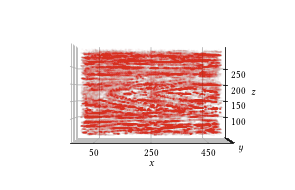

In [83]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-0)
ax.set_ylabel(r'$y$',labelpad=-12)
ax.set_zlabel(r'$z$',labelpad=3)

ax.set_xticks([8900,9100,9300])
ax.set_zticks([100,150,200,250])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)

ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.01,s=1,c=colormap[0])
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(5)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(3.)
    
ax.set_yticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[1],azim=_azim_ang_config[1])

fig.subplots_adjust(left=-0.3, right=1.13, top=1.25, bottom=-0.1)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view2-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view2-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


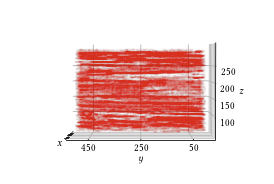

In [84]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-13)
ax.set_ylabel(r'$y$',labelpad=-2)
ax.set_zlabel(r'$z$',labelpad=-4)

ax.set_yticks([11800,12000,12200])
ax.set_zticks([100,150,200,250])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
 
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.01,s=1,c=colormap[0])
    
for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-3.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-5)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(0.)
    
ax.set_xticklabels([])
ax.set_rasterization_zorder(1)

ax.view_init(elev=_elev_ang_config[2],azim=_azim_ang_config[2])

fig.subplots_adjust(left=-0.22, right=1.1, top=1.25, bottom=-0.05)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view3-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view3-small.png',dpi=dpi)

/home/arne/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:785: UserWarning: Rasterization of 'Axes3DSubplot(0.125,0.125;0.775x0.755)' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


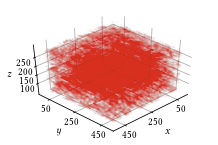

In [85]:
fig = plt.figure(figsize=(2.66,1.74))
ax = fig.add_subplot(111,projection='3d',rasterized=True)

ax.w_xaxis.set_pane_color((1.,1.,1.,0.)) 
ax.w_yaxis.set_pane_color((1.,1.,1.,0.))
ax.w_zaxis.set_pane_color((1.,1.,1.,0.))
ax.set_xlabel(r'$x$',labelpad=-3)
ax.set_ylabel(r'$y$',labelpad=-3)

ax.set_yticks([11800,12000,12200])
ax.set_xticks([8900,9100,9300])
ax.set_zticks([100,150,200,250])
ax.set_xticklabels([r'$50$',r'$250$',r'$450$'])
ax.set_yticklabels([r'$50$',r'$250$',r'$450$'])

ax.text(9420,11500,70,r'$z$', fontsize=10)

ax.tick_params(axis='all',which='major',labelsize=12)
ax.tick_params(axis='all',which='minor',labelsize=10)
 
ax.scatter(points[:,0],points[:,1],points[:,2],alpha=0.01,s=1,c=colormap[0])

for tick in ax.get_xaxis().get_major_ticks():
    tick.set_pad(-4.)
    
for tick in ax.get_yaxis().get_major_ticks():
    tick.set_pad(-4)
    
for tick in ax.zaxis.get_major_ticks():
    tick.set_pad(-2.)
    
ax.view_init(elev=_elev_ang_config[3],azim=_azim_ang_config[3])
fig.subplots_adjust(left=0.04, right=1.05, top=1.04, bottom=0.05)

if savenewfigs:
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view4-small.pgf',dpi=dpi)
    plt.savefig('generated_figs/fjord/fjord-abd-domain-view4-small.png',dpi=dpi)